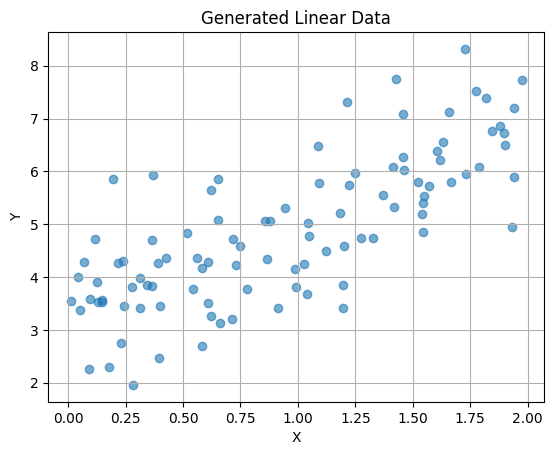

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 개수
n = 100

# 임의의 x 값 생성
np.random.seed(42)
x = 2 * np.random.rand(n, 1)

# y = 2x + 3 + 임의의 노이즈 생성
y = 2 * x + 3 + np.random.randn(n, 1)

# 데이터 시각화
plt.scatter(x, y, alpha=0.6)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Linear Data')
plt.grid(True)
plt.show()


### 최소자승법 (Ordinary Least Squares, OLS): 

- 최소자승법은 회귀계수를 직접 계산하는 방법입니다. 회귀계수는 다음과 같은 공식으로 계산됩니다.

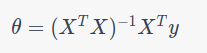


여기서 
θ는 회귀계수 벡터, 
X는 설계 행렬(design matrix)입니다.

먼저, 
X 행렬에 1로 구성된 열을 추가하여 상수항을 포함하도록 합니다. 그런 다음 위의 공식을 사용하여 
θ 값을 계산해보겠습니다.

In [3]:
# 상수항을 포함한 설계 행렬 X 생성
X_b = np.c_[np.ones((n, 1)), x]

# 최소자승법으로 theta 계산
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.21509616],
       [1.77011339]])

- 상수항: 
≈
3.215
≈3.215
- x의 계수: 
≈
1.770
≈1.770

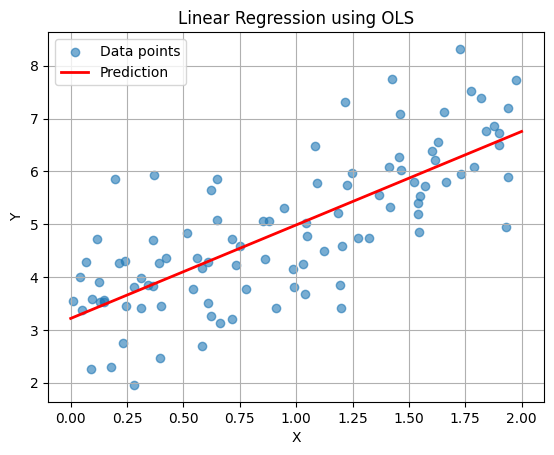

In [4]:
# 예측선을 그리기 위한 x 값
x_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), x_new]

# 예측값 계산
y_predict = X_new_b.dot(theta_best)

# 원래 데이터와 예측선 그리기
plt.scatter(x, y, alpha=0.6, label="Data points")
plt.plot(x_new, y_predict, "r-", linewidth=2, label="Prediction")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression using OLS')
plt.legend()
plt.grid(True)
plt.show()

### 경사하강법 (Gradient Descent)
- 경사하강법은 비용 함수를 최소화하기 위해 반복적으로 파라미터를 조정하는 최적화 알고리즘입니다.

- 선형 회귀에서 사용되는 비용 함수는 평균 제곱 오차 (MSE)입니다. 경사하강법의 목표는 이 비용 함수를 최소화하는 파라미터 
θ를 찾는 것입니다.

먼저, 경사하강법의 학습률 및 반복 횟수와 같은 파라미터를 설정합니다. 그런 다음, 각 반복에서 비용 함수의 그래디언트를 계산하고, 이를 사용하여 파라미터를 업데이트합니다.

이제 경사하강법을 사용하여 선형 회귀 파라미터를 찾아보겠습니다.

In [6]:
# 경사하강법 설정값
eta = 0.1  # 학습률
n_iterations = 1000
m = n

# 초기 theta 값 (임의로 설정)
theta = np.random.randn(2, 1)

# 경사하강법의 첫 번째 단계만 수행
gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
theta -= eta * gradients


# # 경사하강법 수행
# for iteration in range(n_iterations):
#     gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
#     theta -= eta * gradients
    
theta

array([[3.21509616],
       [1.77011339]])

* gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)

- 목적: 비용 함수의 그래디언트 계산
- X_b.dot(theta): 현재 파라미터로 예측값 계산
- X_b.dot(theta) - y: 예측 오차 계산
- X_b.T.dot(...): 오차에 대한 그래디언트 계산
- theta -= eta * gradients

- 목적: 파라미터 업데이트
- 그래디언트 방향으로 학습률만큼 파라미터 조정
- 간단히 말하면, 경사하강법은 현재의 파라미터에서 예측 오차를 계산하여 - 그 오차의 그래디언트를 구하고, 그 그래디언트의 방향으로 파라미터를 조정하는 과정을 반복하는 것이다.

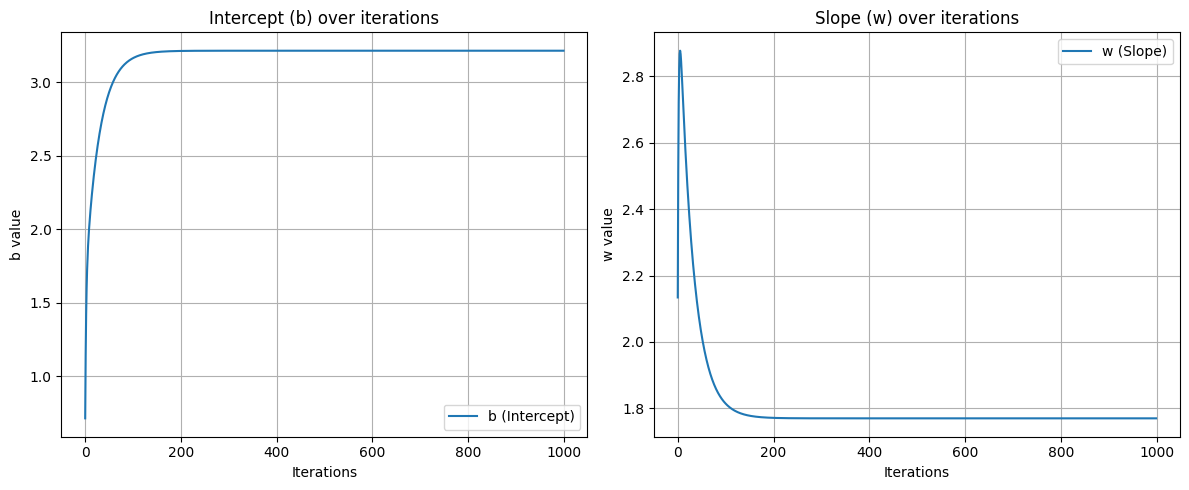

In [8]:
# 데이터 생성
n = 100
np.random.seed(42)
x = 2 * np.random.rand(n, 1)
y = 2 * x + 3 + np.random.randn(n, 1)
X_b = np.c_[np.ones((n, 1)), x]

# 경사하강법 수행
eta = 0.1  # 학습률
n_iterations = 1000
m = n
theta = np.random.randn(2, 1)
theta_path = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients
    theta_path.append(theta.copy())

# 저장된 theta 값에서 w와 b 추출
b_values, w_values = zip(*theta_path)

# 그래프 그리기
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(b_values, label="b (Intercept)")
plt.title("Intercept (b) over iterations")
plt.xlabel("Iterations")
plt.ylabel("b value")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(w_values, label="w (Slope)")
plt.title("Slope (w) over iterations")
plt.xlabel("Iterations")
plt.ylabel("w value")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()